In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy import stats
import seaborn as sns
import sequencer
import pandas as pd
from scipy.io import loadmat
from scipy.io import loadmat, savemat
import numpy as np

In [2]:
dataset_mat = loadmat("RFDataWithCoords_raw_unfiltered.mat")
dataset_imageRFs = dataset_mat['imageRFs']
dataset_t = dataset_mat['t']

In [3]:
# Extracting the coordinates and stations from the RFStruct
RFStruct = dataset_mat['RFStruct'][0]
latitudes = [strct['Lat'][0][0] for strct in RFStruct]
longitudes = [strct['Lon'][0][0] for strct in RFStruct]
grid_numbers = [strct['GridNumber'][0] for strct in RFStruct]

# Combine latitudes and longitudes into coordinates
coordinates = list(zip(latitudes, longitudes))

In [4]:
print(dataset_imageRFs.shape)
print(dataset_t.shape)

(417, 1001)
(1, 1001)


#### Plotting Colormesh

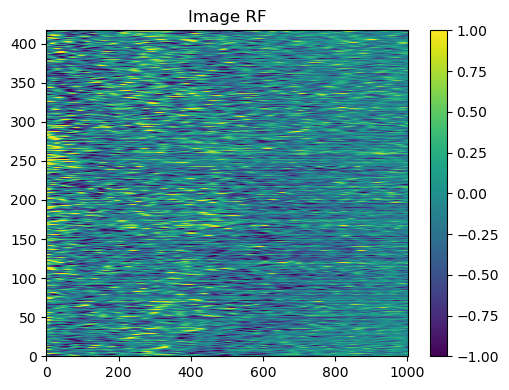

In [5]:
plt.figure(1, figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Image RF")
plt.pcolormesh(dataset_imageRFs)
plt.colorbar()

plt.tight_layout()
plt.show()

#### Trying to Look at the Signal Characteristics

#### Sequencer

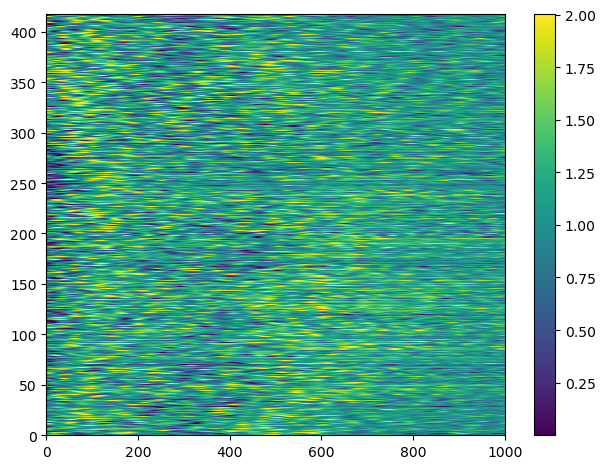

In [6]:

# Find the maximum value in the original array
max_value = np.max(dataset_imageRFs)

# Subtract each value in the array from the maximum value to flip the sign and normalize the data
dataset_imageRFs_pos = (max_value - dataset_imageRFs)+0.000000001
#dataset_imageRFs_pos = dataset_imageRFs + 2

plt.pcolormesh(dataset_imageRFs_pos)
plt.colorbar()

plt.tight_layout()
plt.show()

In [7]:
gridlen = dataset_imageRFs_pos.shape[1]
grid = numpy.arange(0,gridlen)

estimator_list = ['KL', 'L2']
seq = sequencer.Sequencer(grid, dataset_imageRFs_pos, estimator_list)
output_path = "sequencer_output"
final_elongation, final_sequence = seq.execute(output_path)
print("resulting elongation for the Sequencer: ", final_elongation)

calculating the distance matrices for estimator: KL, scale: 1
finished calculating this distance matrix list, it took: 10.469475984573364 seconds
calculating the distance matrices for estimator: KL, scale: 2
finished calculating this distance matrix list, it took: 14.362333536148071 seconds
calculating the distance matrices for estimator: KL, scale: 4
finished calculating this distance matrix list, it took: 22.36175560951233 seconds
calculating the distance matrices for estimator: KL, scale: 8
finished calculating this distance matrix list, it took: 36.56759238243103 seconds
calculating the distance matrices for estimator: KL, scale: 16
finished calculating this distance matrix list, it took: 60.46442937850952 seconds
calculating the distance matrices for estimator: KL, scale: 32
finished calculating this distance matrix list, it took: 114.01770091056824 seconds
calculating the distance matrices for estimator: L2, scale: 1
finished calculating this distance matrix list, it took: 0.5467

/scratch/tolugboj_lab/softwares/anaconda/anaconda3/2021.05/envs/instaseis/lib/python3.8/site-packages/sequencer/sequencer_.py:1025: RuntimeWarning: divide by zero encountered in divide
  distance_matrix = 1.0 / proximity_matrix_copy


dumped the sparse distance matrix to the file: <_io.BufferedWriter name='sequencer_output/sparse_distance_matrix.pkl'>
dumped the final sequences and elongation to the file: <_io.BufferedWriter name='sequencer_output/final_products.pkl'>
resulting elongation for the Sequencer:  2.057088142435692


In [8]:
estimator_list, scale_list, elongation_list = seq.return_elongation_of_weighted_products_all_metrics_and_scales()

print("intermediate elongations for the different metrics and scales:")
for i in range(len(estimator_list)):
    print("metric=%s, scale=%s, elongation: %s" % (estimator_list[i],
                                                   scale_list[i],
                                                   numpy.round(elongation_list[i], 2)))

intermediate elongations for the different metrics and scales:
metric=KL, scale=1, elongation: 1.92
metric=KL, scale=2, elongation: 1.94
metric=KL, scale=4, elongation: 1.92
metric=KL, scale=8, elongation: 2.89
metric=KL, scale=16, elongation: 2.5
metric=KL, scale=32, elongation: 3.49
metric=L2, scale=1, elongation: 1.68
metric=L2, scale=2, elongation: 2.06
metric=L2, scale=4, elongation: 2.28
metric=L2, scale=8, elongation: 2.23
metric=L2, scale=16, elongation: 2.17
metric=L2, scale=32, elongation: 3.06


In [12]:
gridlen = dataset_imageRFs_pos.shape[1]
grid = numpy.arange(0,gridlen)

estimator_list = ['KL']
scale_list = [[32]]
seq_bst = sequencer.Sequencer(grid, dataset_imageRFs_pos, estimator_list,scale_list)
output_path = "sequencer_output/best"
final_elongation_bst, final_sequence_bst = seq_bst.execute(output_path)
print("resulting elongation for the Sequencer: ", final_elongation_bst)

calculating the distance matrices for estimator: KL, scale: 32
finished calculating this distance matrix list, it took: 113.46220231056213 seconds
dumped the distance matrix dictionaries to the file: sequencer_output/best/distance_matrices.pkl
strating to sequence the different scales and estimators
in estimator: KL, scale: 32
dumped the elongations to the file: sequencer_output/best/elongations.pkl
dumped the full weighted distance matrix to the file: sequencer_output/best/weighted_distance_matrix.pkl
dumped the sparse distance matrix to the file: <_io.BufferedWriter name='sequencer_output/best/sparse_distance_matrix.pkl'>
dumped the final sequences and elongation to the file: <_io.BufferedWriter name='sequencer_output/best/final_products.pkl'>
resulting elongation for the Sequencer:  3.485217581330619


In [13]:
# After obtaining final_sequence_bst, reorder the coordinates and GridNumbers
coordinates_reordered = [coordinates[i] for i in final_sequence_bst]
grid_numbers_reordered = [grid_numbers[i] for i in final_sequence_bst]

/scratch/scarr13/tmp/ipykernel_63221/68039239.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(scaled_ticks)
/scratch/scarr13/tmp/ipykernel_63221/68039239.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(scaled_ticks)


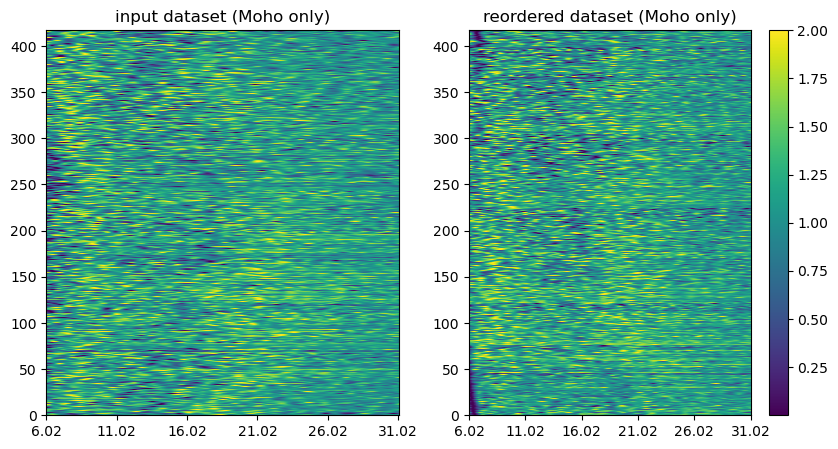

In [14]:
dataset_imageRFs_pos_reordered = dataset_imageRFs_pos[final_sequence_bst,:]

fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].set_title("input dataset (Moho only)")
c = ax[0].pcolormesh(dataset_imageRFs_pos)
current_ticks = ax[0].get_xticks()
#scaled_ticks = numpy.around(dataset_t.flatten().tolist()[::int((1001/len(current_ticks)))],2)
scaled_ticks = numpy.around(dataset_t.flatten().tolist()[::200],2)
ax[0].set_xticklabels(scaled_ticks)
#fig.colorbar(c,ax=ax[0])

#fig, ax = plt.subplots(1,1)
ax[1].set_title("reordered dataset (Moho only)")
c = ax[1].pcolormesh(dataset_imageRFs_pos_reordered)
#current_ticks = ax[1].get_xticks()
#scaled_ticks = numpy.around(dataset_t.flatten().tolist()[::int((1001/len(current_ticks)))],2)
scaled_ticks = numpy.around(dataset_t.flatten().tolist()[::200],2)
ax[1].set_xticklabels(scaled_ticks)
fig.colorbar(c,ax=ax[1])

#plt.tight_layout()
plt.show()

In [15]:
# Save the reordered dataset, coordinates, and GridNumbers for use in Matlab
# Save the reordered dataset, coordinates, and GridNumbers for use in Matlab
savemat("unfiltered_full.mat", {
    "dataset_imageRFs_pos_reordered": dataset_imageRFs_pos_reordered,
    "coordinates_reordered": coordinates_reordered,
    "grid_numbers_reordered": grid_numbers_reordered,
    "time_vector": dataset_t  # adding the time vector here
})

In [16]:
print(coordinates_reordered)


[(41.5, -79.7), (35.2, -85.3), (38.9, -106.9), (37.1, -122.2), (37, -80), (37.7, -88.6), (42.7, -99.6), (37.7, -93.3), (42.6, -107.3), (45.9, -90.1), (40.1, -83.6), (38.2, -105.1), (41.5, -102.4), (35.8, -83.6), (43.6, -114.4), (45.9, -102.7), (38.3, -103.4), (42.4, -78.6), (37, -112.4), (29, -97.1), (44.6, -123.3), (44.7, -123.3), (32.1, -105.5), (33.3, -85.2), (38.9, -86.4), (42, -107.4), (39.6, -83.8), (41.5, -78.8), (29.5, -102.9), (42.2, -75), (42.8, -75.6), (41.9, -93.2), (33.3, -85.2), (38.1, -104.3), (29.4, -96.3), (45.9, -68.3), (47.2, -110.7), (44.6, -74.6), (40.9, -82.4), (41.6, -107.4), (41.5, -84), (42.2, -73.6), (42.9, -90.2), (41.5, -95.7), (33.3, -90.4), (40.9, -78.3), (39.5, -81.4), (44.6, -90.4), (44, -74.2), (39, -99.4), (43.4, -76), (37.7, -89.2), (39.6, -81.4), (47.1, -118.9), (37, -94.3), (36.4, -103.7), (38.1, -91.2), (36.9, -96.5), (32.7, -104.7), (47.1, -83.1), (35.6, -79.2), (27.6, -99.3), (45.9, -108.9), (40.2, -96.7), (47.7, -114.6), (39, -80.8), (35.9, -95.